# Maize Leaf Disease Prediction Using a CNN Model

# Objective

This project aims to develop an accurate and efficient method for detecting diseases of Maize plants by analyzing the images of leaves.

# Data

Dataset Credits: https://data.mendeley.com/datasets/tywbtsjrjv/1

## 1. Setup and Load Data

### 1.1 Import Dependencies 

In [1]:
import tensorflow as tf
import splitfolders
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.2  Load Data

In [2]:
dataset = tf.keras.utils.image_dataset_from_directory('data/maize-leaf-images',
                                                  batch_size=32,
                                                  image_size=(256, 256),
                                                  shuffle=True,
                                                  )

Found 3852 files belonging to 4 classes.


In [3]:
class_names = dataset.class_names
class_names

['Common Rust', 'Gray Leaf Spot', 'Healthy', 'Northern Leaf Blight']

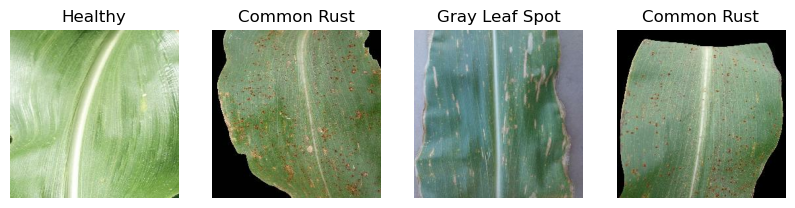

In [5]:
# visualize sample data
plt.figure(figsize=(10,10))

for img_batch, label_batch in dataset.take(1):
    for i in range(4):
        ax = plt.subplot(1,4, i+1)
        plt.imshow(img_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

## 2. Preprocess Data

### 2.1 Split Data

* Use splitfolders tool to split dataset into training, validation and test directories.

* Split with a ratio.

In [6]:
# main data directory
dir1 = 'data/maize-leaf-images'

In [8]:
# second directory for the split data
dir2 = 'data/maize-leaf-images2'
os.listdir(dir2)

[]

In [9]:
splitfolders.ratio(dir1, 
                  output=dir2,
                  seed=27,
                  ratio=(0.8, 0.1, 0.1),
                  group_prefix=None)

Copying files: 3852 files [00:11, 334.52 files/s]


### 2.2 Data Augmentation

In [10]:
# derive the training, validation, and testing directories
train_path = dir2+'\\train\\'
test_path = dir2+'\\test\\'
validation_path = dir2+'\\val\\'

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
image_gen = ImageDataGenerator(rotation_range=10, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1.0/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest' 
                              )

In [13]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=(256, 256),
                                                color_mode='rgb',
                                                batch_size=32,
                                                class_mode='sparse'
                                               )

Found 3080 images belonging to 4 classes.


In [14]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=(256, 256),
                                               color_mode='rgb',
                                               batch_size=32,
                                               class_mode='sparse')

Found 388 images belonging to 4 classes.


In [15]:
validation_image_gen = image_gen.flow_from_directory(validation_path,
                                                     target_size=(256, 256),
                                                     color_mode='rgb',
                                                     batch_size=32,
                                                     class_mode='sparse')

Found 384 images belonging to 4 classes.


## 3. Build Deep Model

### 3.1 Create Neural Network

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [17]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))    
   
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))    
   
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))    
    
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))    

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(4))
model.add(Activation('softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

### 3.2 Compile the Model

* Use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses and `accuracy` as a metric

In [19]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

### 3.3 Train the Model

In [20]:
hist = model.fit(train_image_gen,
                 epochs=30,
                 validation_data=validation_image_gen,
                 batch_size=32,
                 verbose=1
                )

Epoch 1/30
97/97 [==============================] - 311s 3s/step - loss: 0.9038 - accuracy: 0.5510 - val_loss: 0.6888 - val_accuracy: 0.6693
Epoch 2/30
97/97 [==============================] - 350s 4s/step - loss: 0.8259 - accuracy: 0.6237 - val_loss: 0.6569 - val_accuracy: 0.6354
Epoch 3/30
97/97 [==============================] - 438s 4s/step - loss: 0.3952 - accuracy: 0.8295 - val_loss: 0.3040 - val_accuracy: 0.8620
Epoch 4/30
97/97 [==============================] - 341s 4s/step - loss: 0.3453 - accuracy: 0.8500 - val_loss: 0.2868 - val_accuracy: 0.8620
Epoch 5/30
97/97 [==============================] - 345s 4s/step - loss: 0.2715 - accuracy: 0.8782 - val_loss: 0.2301 - val_accuracy: 0.8906
Epoch 6/30
97/97 [==============================] - 308s 3s/step - loss: 0.2261 - accuracy: 0.8981 - val_loss: 0.1814 - val_accuracy: 0.9036
Epoch 7/30
97/97 [==============================] - 307s 3s/step - loss: 0.1977 - accuracy: 0.9153 - val_loss: 0.1662 - val_accuracy: 0.9245
Epoch 8/30
97

### 3.4 Plot Performance 

In [21]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

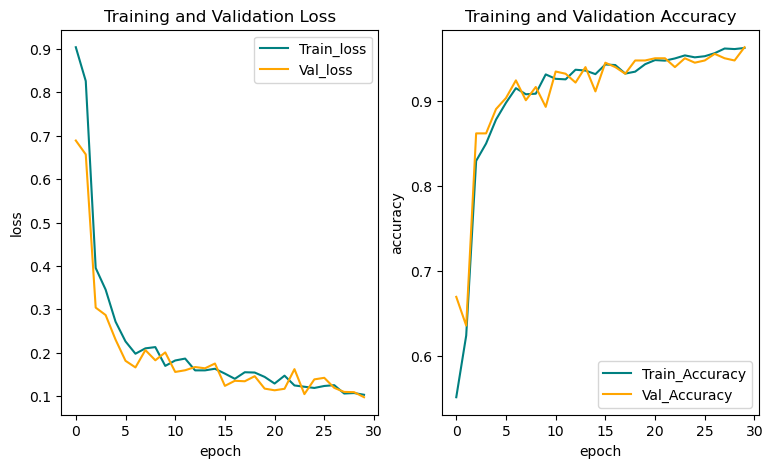

In [22]:
plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], color='teal', label='Train_loss')
plt.plot(hist.history['val_loss'], color='orange', label='Val_loss')
plt.title('Training and Validation Loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], color='teal', label='Train_Accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='Val_Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()

plt.show()

## 4. Evaluate Model

### 4.1. Evaluate

In [28]:
scores = model.evaluate(test_image_gen)

13/13 [==============================] - 13s 981ms/step - loss: 0.1194 - accuracy: 0.9613


In [29]:
scores

[0.11944568157196045, 0.9613401889801025]

### 4.2 Test

actual label: Gray Leaf Spot
1/1 [==============================] - 1s 782ms/step
predicted label: Gray Leaf Spot


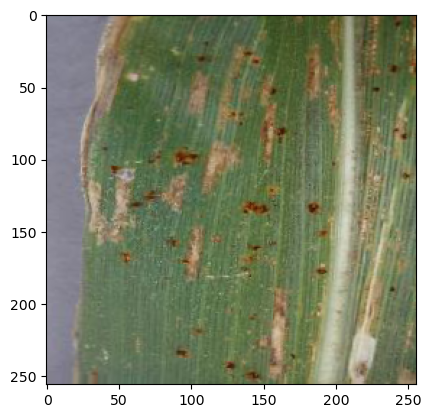

In [30]:
for image_batch, label_batch in test_image_gen:
    img_1 = image_batch[0]
    label_1 = int(label_batch[0])
    plt.imshow(img_1)
    print("actual label:",class_names[label_1])
    
    batch_pred = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_pred[0])])
    
    break

## 5. Save The Model

In [31]:
from tensorflow.keras.models import load_model

model.save('maize-leaf-disease-model.h5')

In [ ]:
# Importing libraries
from fastapi import fastAPI, File, UploadFile
#from fastapi.middleware.cors import CORSMiddleware
import uvicorn
import tensorflow as tf
import numpy as np
from io import BytesIO
from PIL import image

# Creating the app object
app = fastAPI()

# Loading the trained model
model = tf.keras.models.load_model('maize-leaf-disease-model')

# Creating class names
class_names = ['Common Rust', 'Grey Leaf Spot', 'Healthy', 'Northern Leaf Blight']


def read_file_as_image(data) -> np.ndarray:
    image = np.array(Image.open(BytesIO(data))) 
    return image


# Define predict function
@app.post('/predict')
async def predict(file: UploadFile = File(...)):
    image = read_file_as_image(await file.read())  
    img_batch = np.expand_dims(image, axis=0)    
    
    pred = model.predict(img_batch)

    pred_class = class_names[np.argmax(pred[0])]
    confidence = np.max(pred[0])
    return {
        'class': pred_class,
        'confidence': float(confidence)
    }


if __name__ = '__main__':
    uvicorn.run(app, host='localhost', port=8000)

# Use API to create Streamlit APP

In [ ]:
import streamlit as st
import requests


st.title('Maize Disease Classification')


async def get_predictions(carat_weight, cut, color, clarity, polish, symmetry, report):
    url = 'https://iarari.deta.dev/predict?carat_weight={carat_weight}&cut={cut}&color={color}&clarity={clarity}&polish={polish}&symmetry={symmetry}&report={report}' \
        .format(carat_weight=carat_weight, cut=cut, \
                color=color, clarity=clarity, polish=polish, symmetry=symmetry, report=report)
    response = requests.post(url)
    json_response = response.json()
    price=json_response['prediction']
    return price

